Imports and file paths

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Set file paths to downloaded data

dlw_path = '/Volumes/SanDisk/ECCOEXFOR/EXFlwdn_2017_05.nc'
tdsw_path = '/Volumes/SanDisk/ECCOEXFOR/EXFswdn_2017_05.nc'
rain_path = '/Volumes/SanDisk/ECCOEXFOR/EXFpreci_2017_05.nc'
spfh_path = '/Volumes/SanDisk/ECCOEXFOR/EXFaqh_2017_05.nc'
ustr_path = '/Volumes/SanDisk/ECCOEXFOR/EXFuwind_2017_05.nc'
vstr_path = '/Volumes/SanDisk/ECCOEXFOR/EXFvwind_2017_05.nc'


Wind External force

In [2]:
# Load the datasets for 2017 with explicit engine specification
import xarray as xr
ustr_data = xr.open_dataset(ustr_path, engine="netcdf4")
vstr_data = xr.open_dataset(vstr_path, engine="netcdf4")
dlw_data = xr.open_dataset(dlw_path, engine="netcdf4")
tdsw_data = xr.open_dataset(tdsw_path, engine="netcdf4")
spfh_data = xr.open_dataset(spfh_path, engine="netcdf4")
rain_data = xr.open_dataset(rain_path, engine="netcdf4")


import os
print(os.path.exists(ustr_path))  # This should return True if the file exists at the specified path

# Display information for each dataset
print("Zonal Wind Stress Data (2017):", ustr_data)
#print("Meridional Wind Stress Data (2017):", vstr_data)
#print("Downward Longwave Radiation Data (2017):", dlw_data)
#print("Downward Shortwave Radiation Data (2017):", tdsw_data)
#print("Specific Humidity Data (2017):", spfh_data)
#print("Rain Data (2017):", rain_data)  # Preview 2017 rain data



True
Zonal Wind Stress Data (2017): <xarray.Dataset>
Dimensions:    (j: 90, i: 90, tile: 13, time: 1, nv: 2)
Coordinates:
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (tile, j, i) float32 ...
    YC         (tile, j, i) float32 ...
    timestep   (time) int64 ...
  * time       (time) datetime64[ns] 2017-05-16T12:00:00
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    EXFuwind   (time, tile, j, i) float32 ...
Attributes: (12/26)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 3 Extension (ECCOv4r...
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1

In [3]:

# Define spatial region and time slice based on dimensions i and j
time = '2017-05'
i_slice = slice(8, 24)  # Example range for longitude, adjust as needed
j_slice = slice(8, 24)  # Example range for latitude, adjust as needed

# Select region and time for each forcing variable
uwind_selected = ustr_data.sel(time=time, i=i_slice, j=j_slice)
vwind_selected = vstr_data.sel(time=time, i=i_slice, j=j_slice)
lwdn_selected = dlw_data.sel(time=time, i=i_slice, j=j_slice)
swdn_selected = tdsw_data.sel(time=time, i=i_slice, j=j_slice)
aqh_selected = spfh_data.sel(time=time, i=i_slice, j=j_slice)
preci_selected = rain_data.sel(time=time, i=i_slice, j=j_slice)



Frshwater flux External Force

('tile', 'j', 'i')


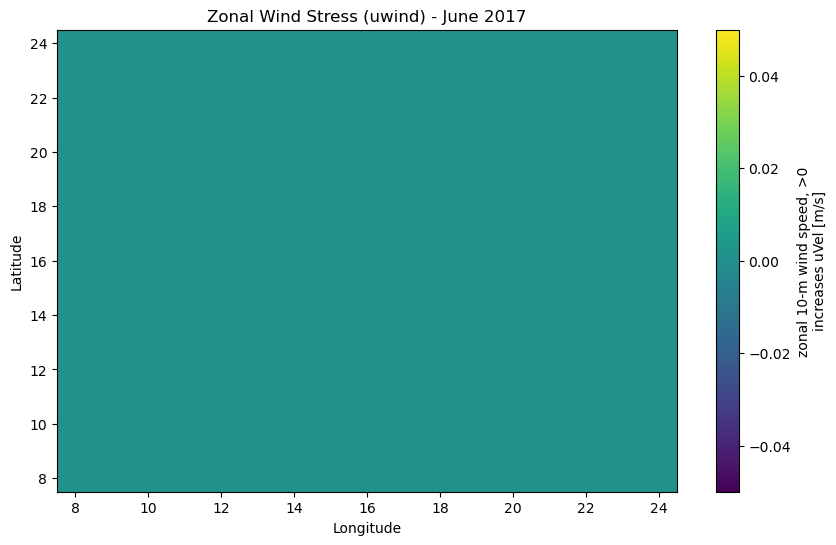

In [12]:
print(uwind_selected['EXFuwind'].isel(time=0).squeeze().dims)



# Select a single tile in addition to the time step
plt.figure(figsize=(10, 6))
uwind_selected['EXFuwind'].isel(time=0, tile=0).plot.pcolormesh(cmap='viridis')
plt.title("Zonal Wind Stress (uwind) - June 2017")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



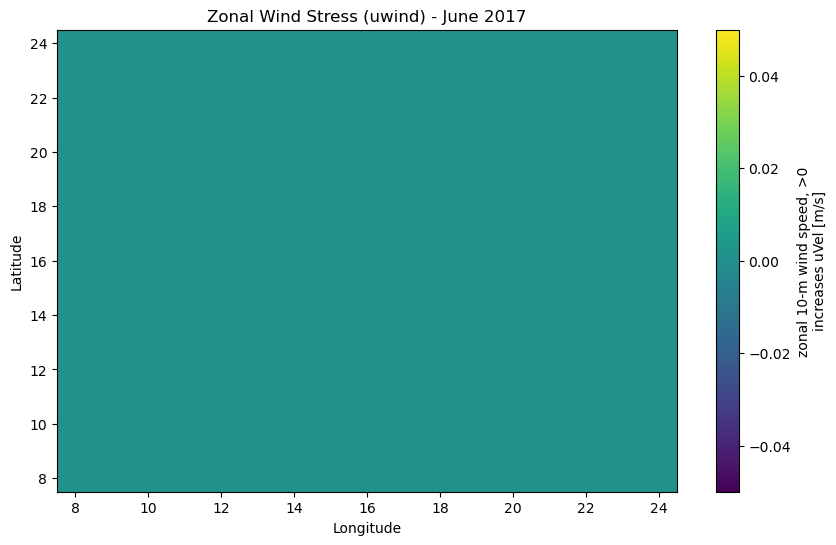

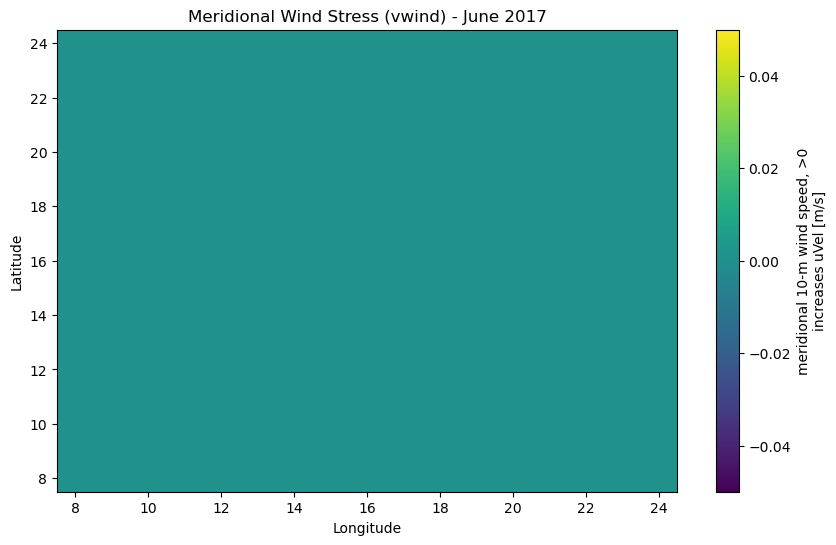

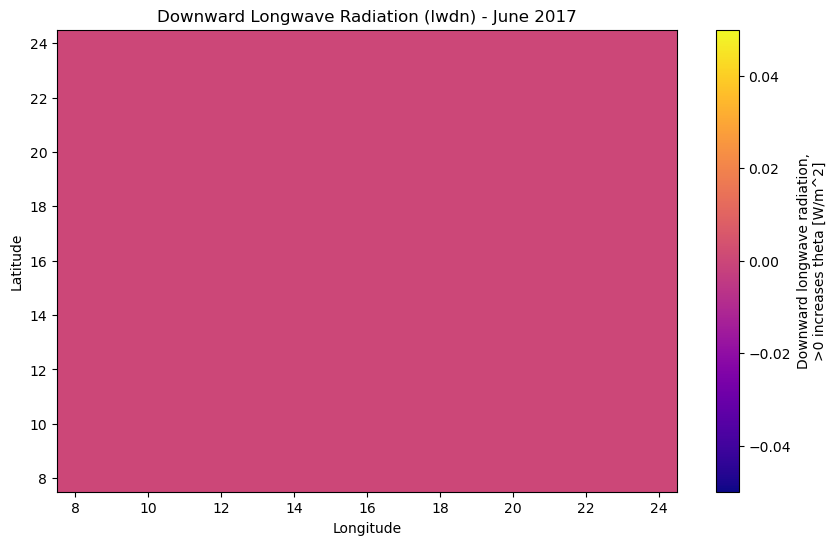

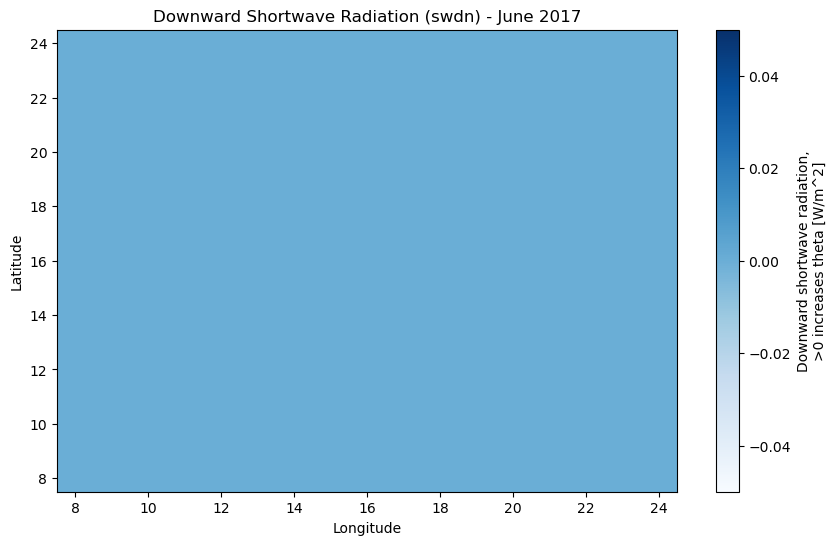

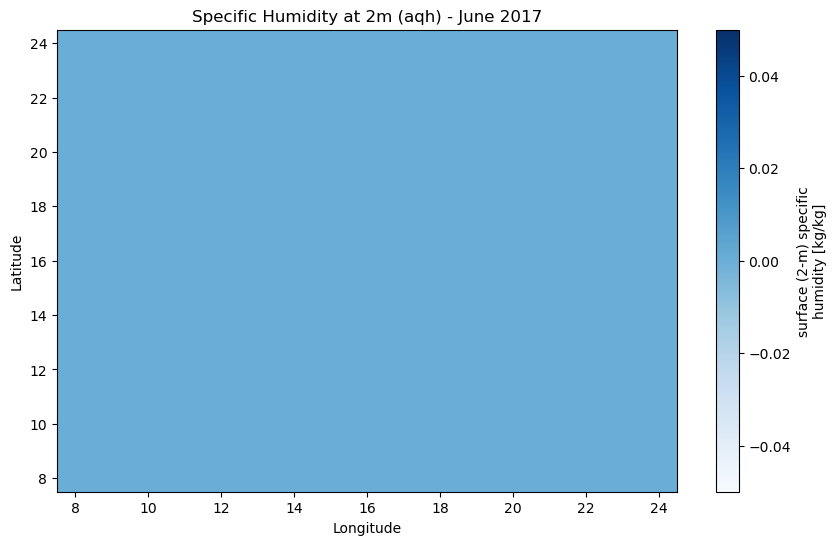

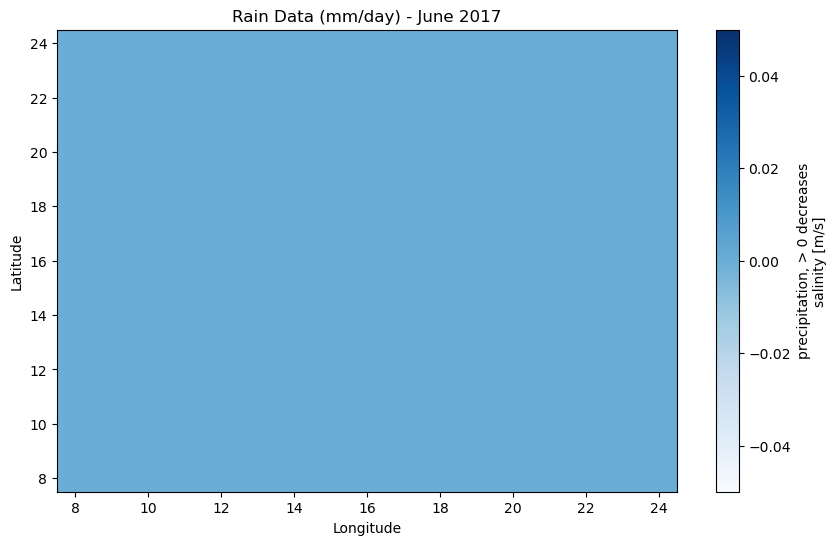

In [13]:
import matplotlib.pyplot as plt

# Plot Zonal Wind Stress for June 2017
plt.figure(figsize=(10, 6))
uwind_selected['EXFuwind'].isel(time=0, tile=0).plot.pcolormesh(cmap='viridis')
plt.title("Zonal Wind Stress (uwind) - June 2017")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot Meridional Wind Stress for June 2017
plt.figure(figsize=(10, 6))
vwind_selected['EXFvwind'].isel(time=0, tile=0).plot.pcolormesh(cmap='viridis')
plt.title("Meridional Wind Stress (vwind) - June 2017")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot Downward Longwave Radiation for June 2017
plt.figure(figsize=(10, 6))
lwdn_selected['EXFlwdn'].isel(time=0, tile=0).plot.pcolormesh(cmap='plasma')
plt.title("Downward Longwave Radiation (lwdn) - June 2017")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot Downward Shortwave Radiation for June 2017
plt.figure(figsize=(10, 6))
swdn_selected['EXFswdn'].isel(time=0, tile=0).plot.pcolormesh(cmap='Blues')
plt.title("Downward Shortwave Radiation (swdn) - June 2017")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot Specific Humidity at 2m for June 2017
plt.figure(figsize=(10, 6))
aqh_selected['EXFaqh'].isel(time=0, tile=0).plot.pcolormesh(cmap='Blues')
plt.title("Specific Humidity at 2m (aqh) - June 2017")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot Rain Data for June 2017
plt.figure(figsize=(10, 6))
preci_selected['EXFpreci'].isel(time=0, tile=0).plot.pcolormesh(cmap='Blues')  # Adjust variable name if necessary
plt.title("Rain Data (mm/day) - June 2017")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()




## Implementation of External Forcing Conditions (2017)
The selected 2017 external forcing conditions, including wind stresses, radiation, specific humidity, and rainfall, will be applied to simulate the impact of monsoon effects on ocean stratification. Wind stresses drive surface currents, radiation affects heat fluxes, and rainfall influences salinity by adding freshwater input during the monsoon season.
